In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Import data to dataframe
data = pd.read_csv('archive (26)/dataset.csv')

C:\Users\Rachel\AppData\Local\Temp\ipykernel_23904\4045579233.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('archive (26)/dataset.csv')


# 1. Data Exploration

In this section we shall explore the columns of the dataframe and analyse them accordingly.

### Basic Column Definition from the [JPL website](https://ssd.jpl.nasa.gov/sbdb_query.cgi)
* SPK-ID: Object primary SPK-ID
* Object ID: Object internal database ID
* Object fullname: Object full name/designation
* pdes: Object primary designation
* name: Object IAU name
* NEO: Near-Earth Object (NEO) flag
* PHA: Potentially Hazardous Asteroid (PHA) flag
* H: Absolute magnitude parameter
* Diameter: object diameter (from equivalent sphere) km Unit
* Albedo: Geometric albedo
* Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
* Orbit_id: Orbit solution ID
* Epoch: Epoch of osculation in modified Julian day form
* Equinox: Equinox of reference frame
* e: Eccentricity
* a: Semi-major axis au Unit
* q: perihelion distance au Unit
* i: inclination; angle with respect to x-y ecliptic plane
* tp: Time of perihelion passage TDB Unit
* moid_ld: Earth Minimum Orbit Intersection Distance au Unit

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [4]:
pd.set_option('display.max_columns', 500)
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [5]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [6]:
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


### Analyse columns

Based on the description of the data above, it can be noticed that many features have missing values. Before imputing or eliminating them, we need to first understand the kind of data each feature holds


In [7]:
data.shape

(958524, 45)

In [8]:
#1. id and spkid
print(data['id'].nunique())
print(data['spkid'].nunique())
print(data['full_name'].nunique())
print(data['pdes'].nunique())

958524
958524
958524
958524


No missing values exist in the ateroid identifying columns.

Now analyse all columns of the 'object' datatype

In [9]:
# Potentially hazardous asteroids
data['pha'].value_counts(normalize=True)

pha
N    0.997799
Y    0.002201
Name: proportion, dtype: float64

In [10]:
# Near Earth Object
data['neo'].value_counts(normalize=True)

neo
N    0.976114
Y    0.023886
Name: proportion, dtype: float64

In [11]:
# Asteroid orbit ID
print(data['orbit_id'].unique())
print(data['orbit_id'].nunique())

['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']
4690


In [12]:
# Comet Designation prefix
print(data['prefix'].unique())
print(data['prefix'].nunique())

[nan 'A']
1


In [13]:
# Equinox reference
print(data['equinox'].unique())
print(data['equinox'].nunique())

['J2000']
1


In [14]:
# Orbit classification
print(data['class'].unique())
print(data['class'].nunique())

['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA']
13


Columns 'id', 'spkid' and 'full_name' are unique for each row. The 'full_name' column values are split into columns 'pdes' and 'name'. These columns can be removed since they will not facilitate in the analysis. The 'id' column has alphanumeric values whereas column 'spkid' doesn't. So column 'id' can be removed as well. 

Columns 'prefix' and 'equinox' have only one value so they can be eliminated as well.

In [15]:
data1 = data.drop(['id', 'pdes', 'name', 'prefix', 'equinox'], axis='columns', inplace=False)

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           958524 non-null  int64  
 1   full_name       958524 non-null  object 
 2   neo             958520 non-null  object 
 3   pha             938603 non-null  object 
 4   H               952261 non-null  float64
 5   diameter        136209 non-null  float64
 6   albedo          135103 non-null  float64
 7   diameter_sigma  136081 non-null  float64
 8   orbit_id        958524 non-null  object 
 9   epoch           958524 non-null  float64
 10  epoch_mjd       958524 non-null  int64  
 11  epoch_cal       958524 non-null  float64
 12  e               958524 non-null  float64
 13  a               958524 non-null  float64
 14  q               958524 non-null  float64
 15  i               958524 non-null  float64
 16  om              958524 non-null  float64
 17  w         

c:\Users\Rachel\python_deeplearning\environments\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rachel\python_deeplearning\environments\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rachel\python_deeplearning\environments\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rachel\python_deeplearning\environments\deep_learning\lib\site-packages\seaborn

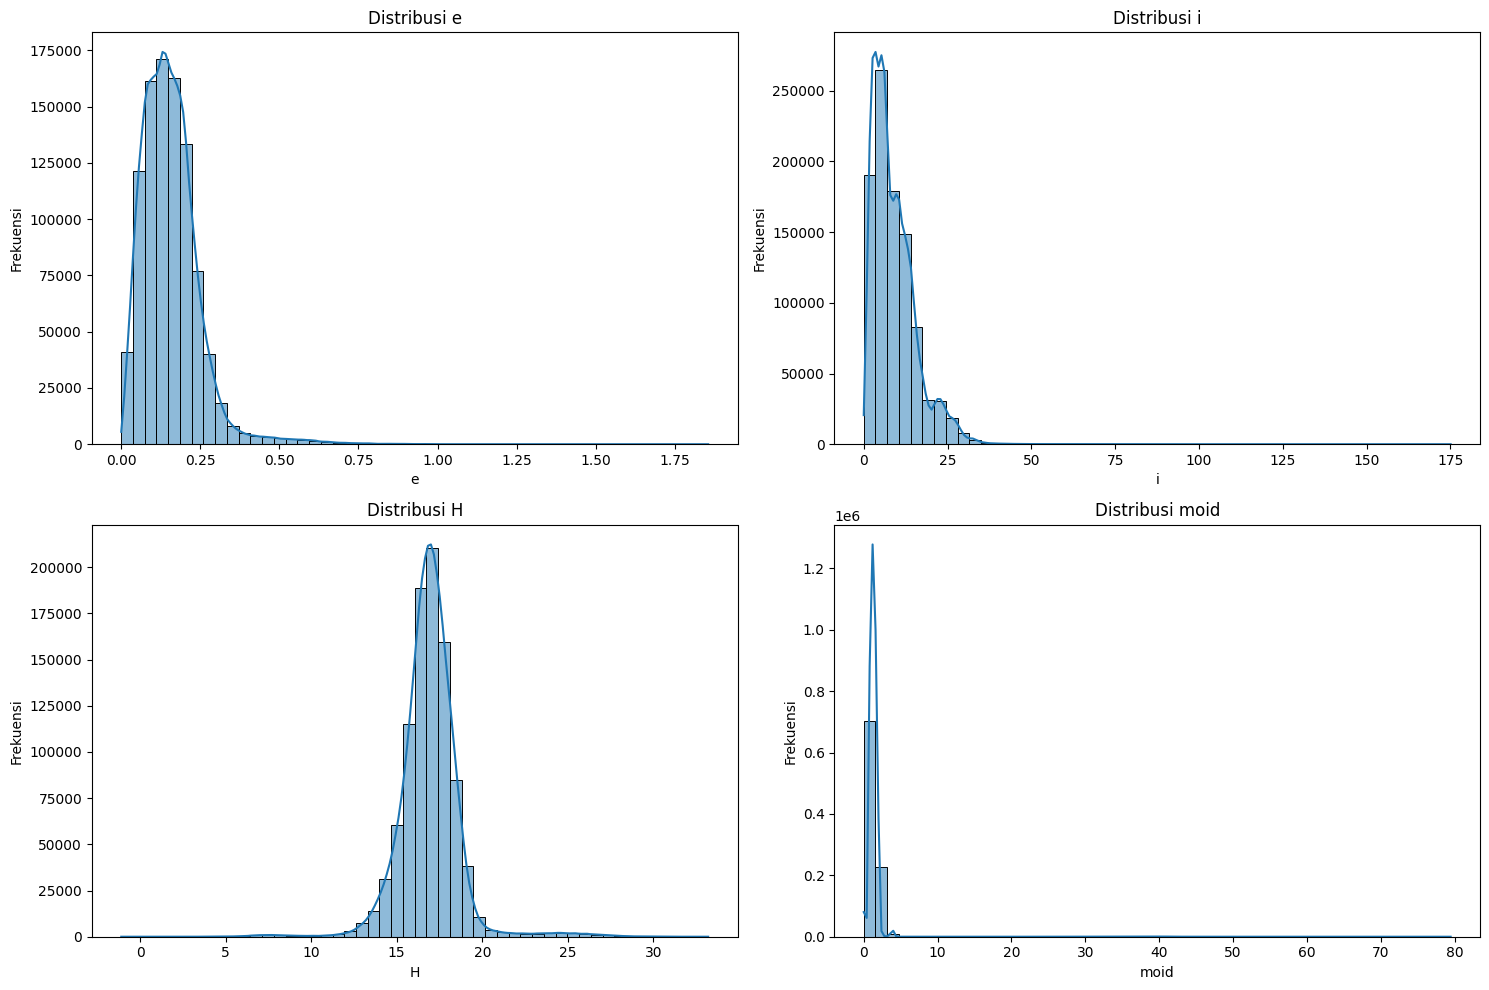

In [17]:
#Histogram distribusi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

features = ['e', 'i', 'H', 'moid']

for idx, col in enumerate(features, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data1[col], bins=50, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


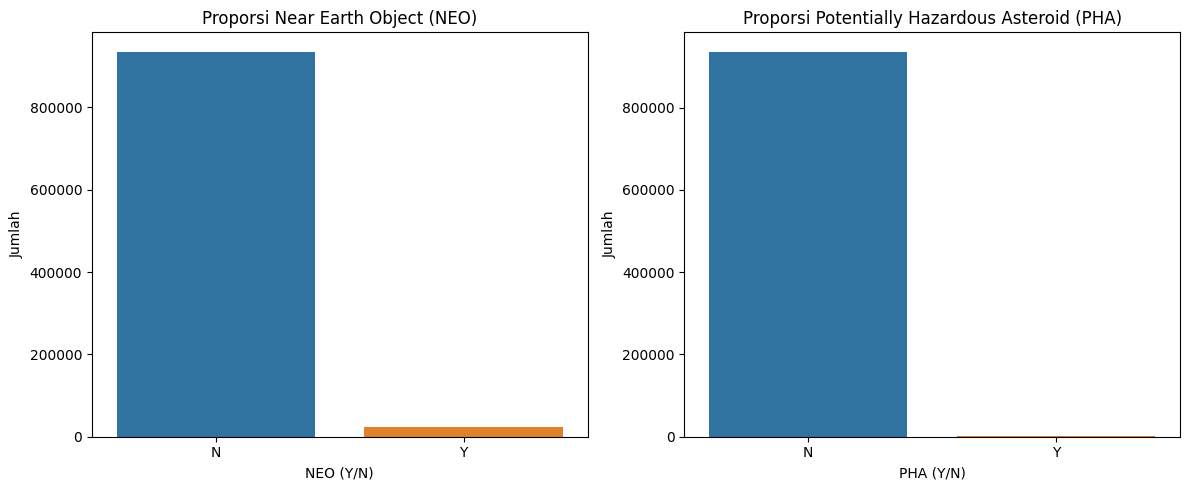

In [18]:
#Bar Plot Proporsi NEO dan PHA
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=data1, x='neo')
plt.title('Proporsi Near Earth Object (NEO)')
plt.xlabel('NEO (Y/N)')
plt.ylabel('Jumlah')

plt.subplot(1,2,2)
sns.countplot(data=data1, x='pha')
plt.title('Proporsi Potentially Hazardous Asteroid (PHA)')
plt.xlabel('PHA (Y/N)')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


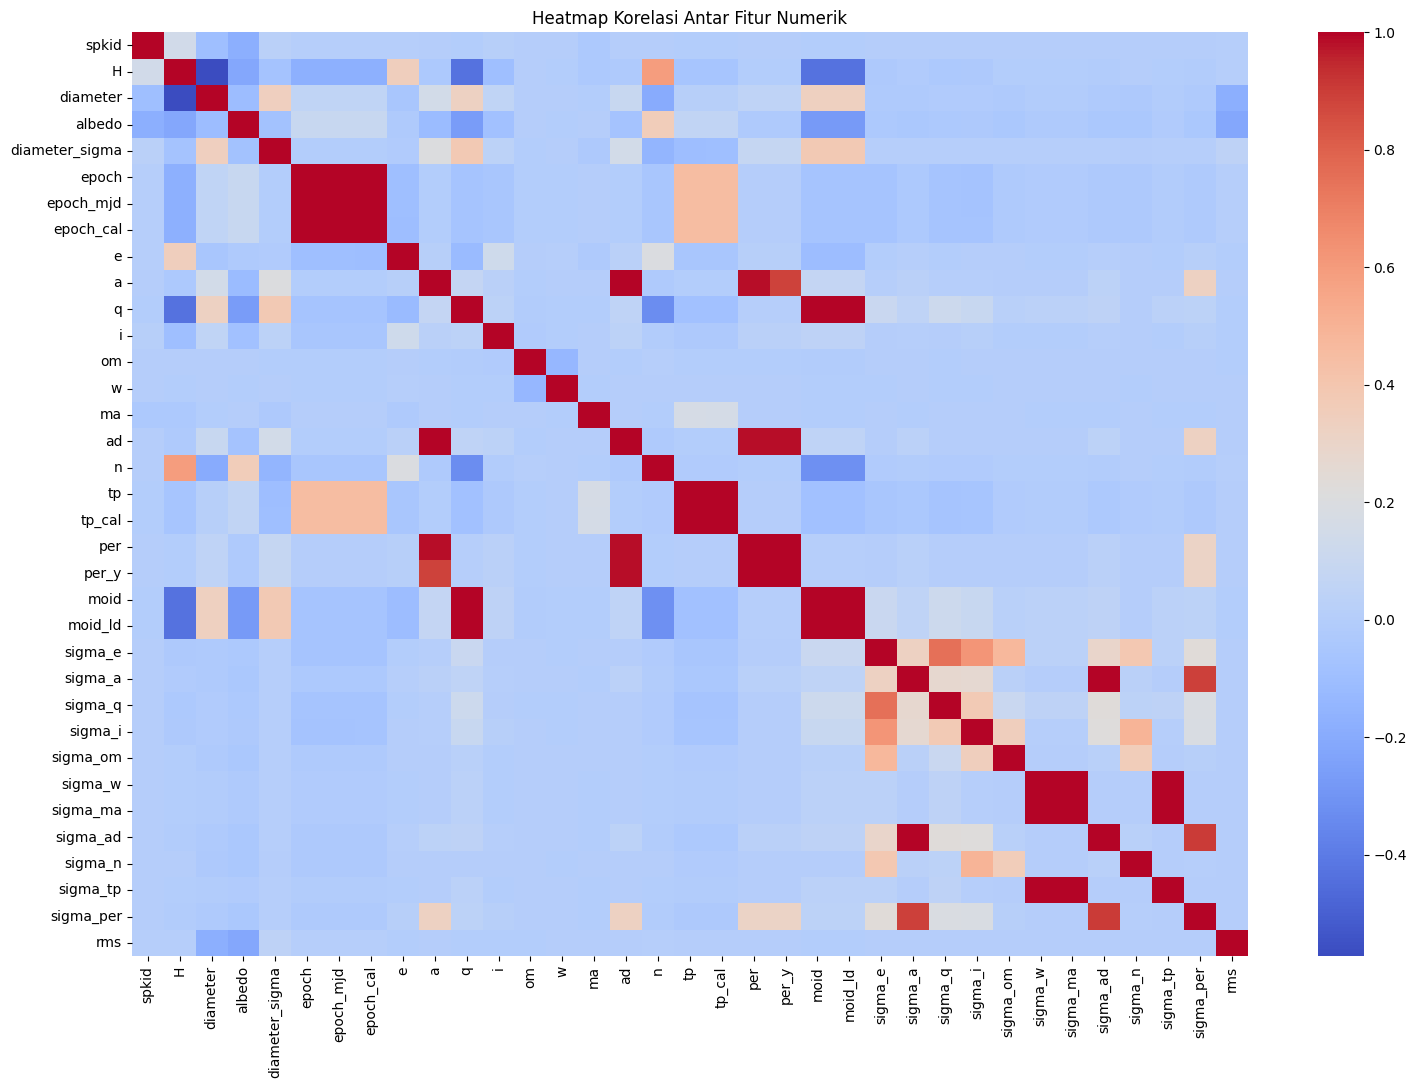

In [19]:
#Heatmap korelasi fitur numerik
plt.figure(figsize=(18,12))

corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)

plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()


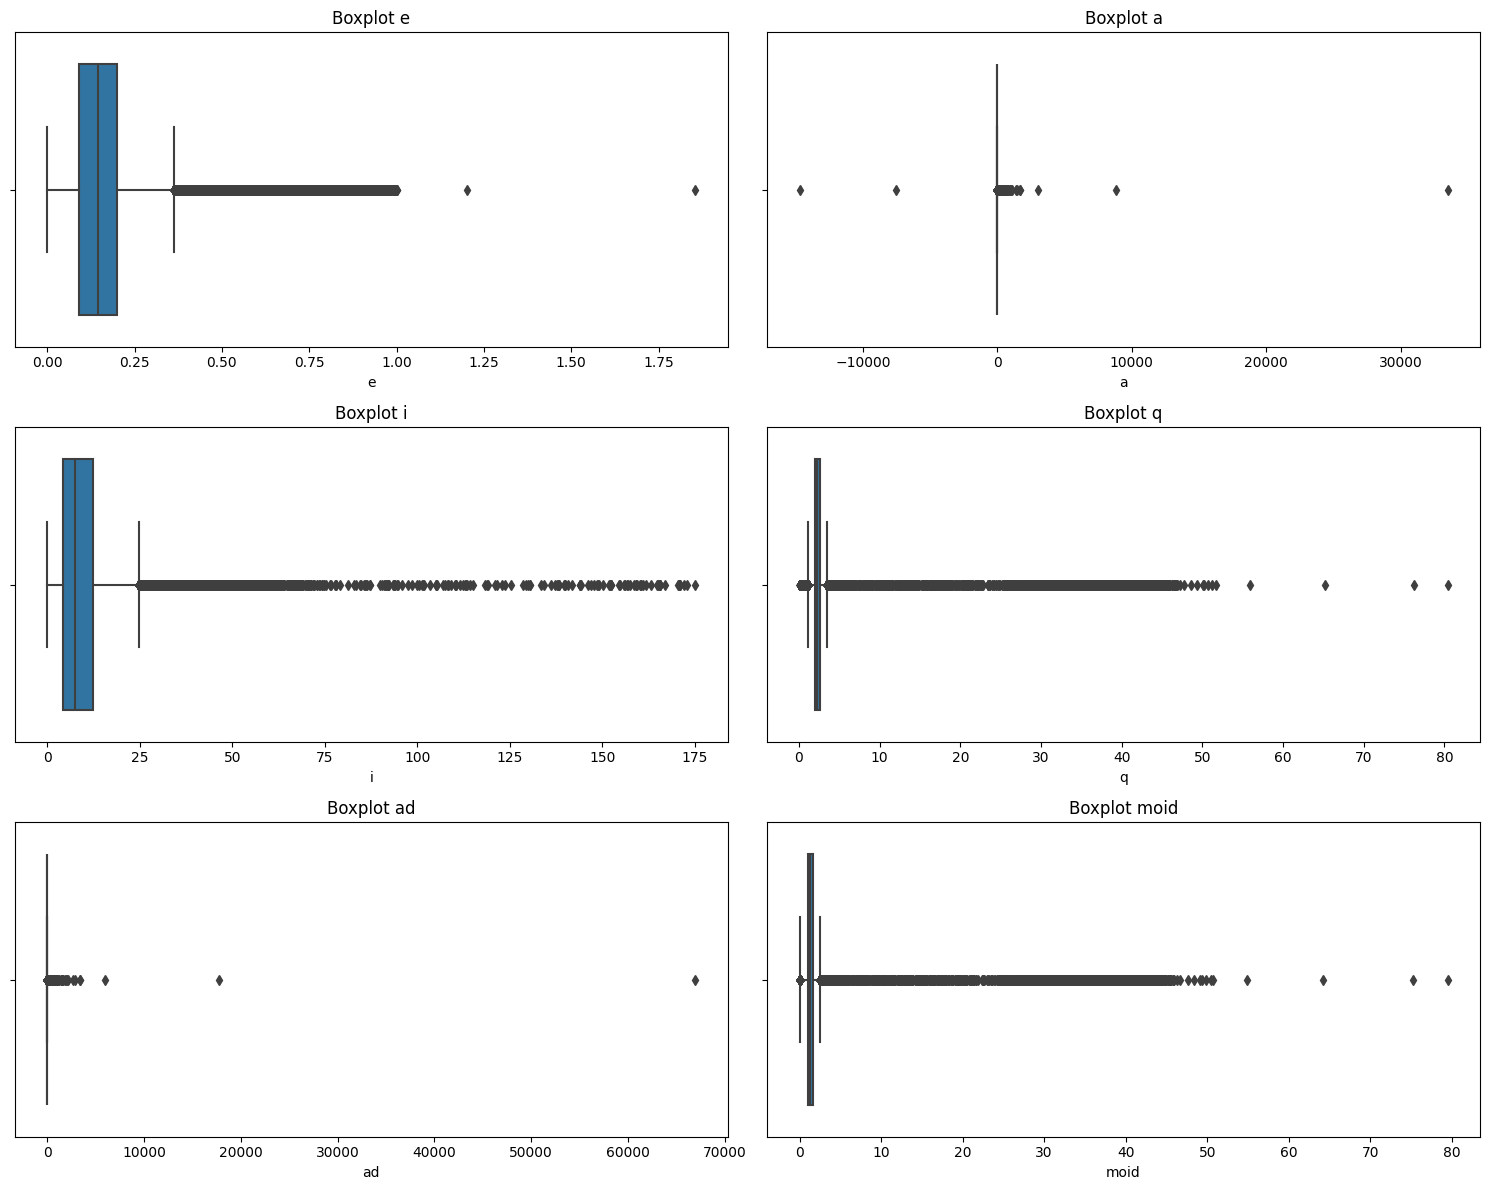

In [20]:
#Boxplot
orbital_features = ['e', 'a', 'i', 'q', 'ad', 'moid']

plt.figure(figsize=(15,12))

for idx, col in enumerate(orbital_features, 1):
    plt.subplot(3, 2, idx)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()


# 2. Data Wrangling (Pre-processing)

In [21]:
data = data1.copy()

print("Shape:", data.shape)
data.head()


Shape: (958524, 40)


,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,1 Ceres,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,2000002,2 Pallas,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,2000003,3 Juno,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,2000004,4 Vesta,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,2000005,5 Astraea,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [22]:
#Identifikasi Kolom Numerik & Kategorikal
num_cols = data.select_dtypes(include=['int64','float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

print("Numerical columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))


Numerical columns: ['spkid', 'H', 'diameter', 'albedo', 'diameter_sigma', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']
Categorical columns: ['full_name', 'neo', 'pha', 'orbit_id', 'class']


Alasan:

Pemilihan teknik preprocessing berbeda untuk numerik (misal scaling, outlier handling) dan kategorikal (encoding). Maka kita harus memisahkan jenis kolom terlebih dahulu.

In [23]:
#Mengatasi Missing Values (a)
# Numeric
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Categorical
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

data.isna().sum()

spkid             0
full_name         0
neo               0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
orbit_id          0
epoch             0
epoch_mjd         0
epoch_cal         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64

Alasan:

Numerik → median (lebih robust terhadap outlier)

Kategorikal → mode (kategori terbanyak paling mewakili data)

In [24]:
#Mengatasi Outlier Dengan IQR (b)
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

# apply to all numerical columns
for col in num_cols:
    data = handle_outliers(data, col)

data.head()


,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001.0,1 Ceres,N,N,13.7,3.972,0.079,0.332,JPL 47,2459000.5,59000.0,20200531.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.433010
1,2000002.0,2 Pallas,N,N,13.7,3.972,0.079,0.332,JPL 37,2459000.5,59000.0,20200531.0,0.229972,2.773841,2.135935,24.770747,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.374216
2,2000003.0,3 Juno,N,N,13.7,3.972,0.079,0.332,JPL 112,2459000.5,59000.0,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.374216
3,2000004.0,4 Vesta,N,N,13.7,3.972,0.079,0.332,JPL 35,2459000.5,59000.0,20200531.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.399800
4,2000005.0,5 Astraea,N,N,13.7,3.972,0.079,0.332,JPL 114,2459000.5,59000.0,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.521910


Alasan:

Outlier dapat merusak model (terutama model sensitif seperti Logistic Regression & KNN).
IQR = metode yang umum untuk "mengikat" nilai ekstrem kembali ke batas aman.

In [25]:
#Encoding Kolom Kategorikal (c)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

data.head()


,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001.0,413389,0,0,13.7,3.972,0.079,0.332,517,2459000.5,59000.0,20200531.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,8,0.433010
1,2000002.0,413390,0,0,13.7,3.972,0.079,0.332,494,2459000.5,59000.0,20200531.0,0.229972,2.773841,2.135935,24.770747,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,8,0.374216
2,2000003.0,413391,0,0,13.7,3.972,0.079,0.332,323,2459000.5,59000.0,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,8,0.374216
3,2000004.0,413392,0,0,13.7,3.972,0.079,0.332,489,2459000.5,59000.0,20200531.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,8,0.399800
4,2000005.0,413393,0,0,13.7,3.972,0.079,0.332,325,2459000.5,59000.0,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,8,0.521910


Alasan:

Algoritma machine learning tidak bisa memproses kategori teks, sehingga perlu diubah menjadi angka.
LabelEncoder cocok karena kategori bersifat ordinal/tidak banyak.

In [26]:
#Memisahkan Fitur dan Label
y = data['pha']
X = data.drop(columns=['pha'])


Alasan:

Model harus diberi:

X = fitur

y = label, di sini targetnya adalah pha (hazardous asteroid)

In [27]:
#Standardisasi Data Numerik (d)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X.head()


,spkid,full_name,neo,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,-1.116671,413389,0,-2.337727,7.549517e-15,-1.387779e-17,-4.996004e-16,517,0.0,0.0,0.0,-0.971934,0.239876,0.679189,0.278573,-0.856818,-1.037385,-0.944846,-0.220041,-0.360566,-1.216649,-1.148429,0.214774,0.214780,0.741839,0.734758,-1.023674,-0.983578,-1.003319,-1.411364,-1.057890,-0.955650,-0.890630,-0.981026,-1.072144,-0.871643,-0.963766,8,-1.538369
1,-1.116670,413390,0,-2.337727,7.549517e-15,-1.387779e-17,-4.996004e-16,494,0.0,0.0,0.0,0.984694,0.251786,-0.305493,2.622209,0.044404,1.240114,-0.305972,0.730684,-0.370957,-1.071835,-1.129392,0.226978,0.226984,-0.108771,-0.045253,-0.828623,-0.931430,-0.814979,-1.021813,-1.001423,-0.916547,-0.824485,-0.925009,-1.012612,-0.808318,-0.913696,8,-2.237738
2,-1.116669,413391,0,-2.337727,7.549517e-15,-1.387779e-17,-4.996004e-16,323,0.0,0.0,0.0,1.327366,-0.017045,-0.662401,0.674832,0.013560,0.642007,-0.490633,0.603328,-0.125245,-0.851942,-1.103123,-0.045982,-0.045972,-0.580689,-0.478003,-0.837261,-0.938713,-0.829760,-1.049504,-0.907108,-0.879470,-0.830080,-0.931769,-1.015693,-0.816863,-0.921518,8,-2.237738
3,-1.116667,413392,0,-2.337727,7.549517e-15,-1.387779e-17,-4.996004e-16,489,0.0,0.0,0.0,-0.810379,-0.798576,-0.268285,-0.292148,-0.628349,-0.294942,-0.770111,-1.119322,0.748900,-1.201138,-1.143277,-0.808749,-0.808727,-0.332484,-0.250398,-1.022279,-0.964085,-0.999247,-1.387477,-1.054922,-0.955163,-0.881670,-0.962496,-1.038790,-0.865325,-0.946507,8,-1.933412
4,-1.116666,413393,0,-2.337727,7.549517e-15,-1.387779e-17,-4.996004e-16,325,0.0,0.0,0.0,0.488317,-0.257076,-0.429678,-0.585476,-0.261323,1.706444,-1.507382,-0.031241,0.115631,-0.006524,0.151638,-0.285184,-0.285171,-0.435669,-0.345019,-0.878698,-0.932244,-0.873416,-1.103730,-0.795251,-0.827168,-0.828634,-0.927638,-1.001466,-0.817710,-0.916290,8,-0.480879


Alasan:

Karena banyak fitur berskala berbeda (contoh: eccentricity vs diameter), maka StandardScaler digunakan agar:

Model konvergen lebih cepat

Menghindari dominasi fitur berskala besar

In [28]:
#Mengatasi Imbalance Data Dengan SMOTE (e)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Before SMOTE:\n", y.value_counts())
print("After SMOTE:\n", y_resampled.value_counts())


Before SMOTE:
 pha
0    956458
1      2066
Name: count, dtype: int64
After SMOTE:
 pha
0    956458
1    956458
Name: count, dtype: int64


Alasan:

Label PHA sangat tidak seimbang (≈ 97% N vs 3% Y).
SMOTE menambah sampel kelas minoritas dengan teknik synthetic sampling → model tidak bias.

In [29]:
#Train / Validation / Test Split (f)
from sklearn.model_selection import train_test_split

# Train 70%
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled,
    test_size=0.30,
    stratify=y_resampled,
    random_state=42
)

# Validation 15%, Test 15%
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_valid.shape)
print("Test:", X_test.shape)


Train: (1339041, 39)
Validation: (286937, 39)
Test: (286938, 39)


Alasan:

Train: model belajar

Validation: tuning hyperparameter

Test: evaluasi final
Dan menggunakan stratify agar distribusi label tetap seimbang

# 3. Modelling

In [30]:
#Import  Library - Mempersiapkan library yang diperlukan untuk training, evaluasi, dan ensemble model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


## Model 1 - Random Forest

In [31]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"   # membantu mengatasi imbalance label PHA
)

# Training model
rf_model.fit(X_train, y_train)

# Prediksi
rf_preds = rf_model.predict(X_test)

# Evaluasi
print("=== RANDOM FOREST PERFORMANCE ===")
print(classification_report(y_test, rf_preds))

=== RANDOM FOREST PERFORMANCE ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143469
           1       1.00      1.00      1.00    143469

    accuracy                           1.00    286938
   macro avg       1.00      1.00      1.00    286938
weighted avg       1.00      1.00      1.00    286938



## Model 2 - XGBoost

In [32]:
# Inisialisasi model XGBoost
balance_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=balance_weight  # untuk handle imbalance PHA
)

# Training model
xgb_model.fit(X_train, y_train)

# Prediksi
xgb_preds = xgb_model.predict(X_test)

# Evaluasi
print("=== XGBOOST PERFORMANCE ===")
print(classification_report(y_test, xgb_preds))


=== XGBOOST PERFORMANCE ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143469
           1       1.00      1.00      1.00    143469

    accuracy                           1.00    286938
   macro avg       1.00      1.00      1.00    286938
weighted avg       1.00      1.00      1.00    286938



# 4. Feature Importance

In [33]:
# Feature Importance dari Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_importances.sort_values(ascending=False).head(10)


moid       0.203897
q          0.165209
class      0.124601
neo        0.106822
moid_ld    0.102917
e          0.062780
H          0.056497
a          0.051196
n          0.032857
per        0.028922
dtype: float64

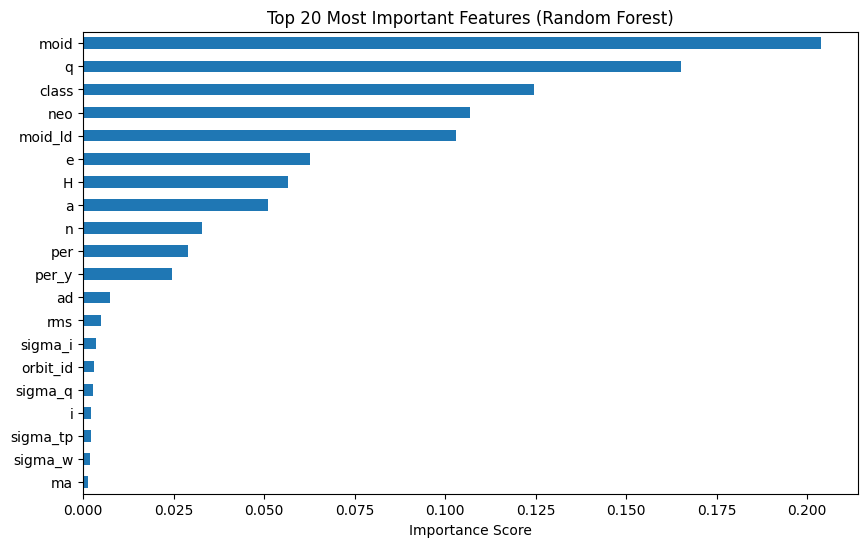

In [34]:
plt.figure(figsize=(10,6))
rf_importances.sort_values().tail(20).plot(kind='barh')
plt.title("Top 20 Most Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


In [35]:
# Feature importance dari XGBoost
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importances.sort_values(ascending=False).head(10)


moid        0.640345
q           0.218896
neo         0.136336
moid_ld     0.000958
sigma_w     0.000388
H           0.000364
sigma_q     0.000257
sigma_tp    0.000256
n           0.000206
class       0.000202
dtype: float32

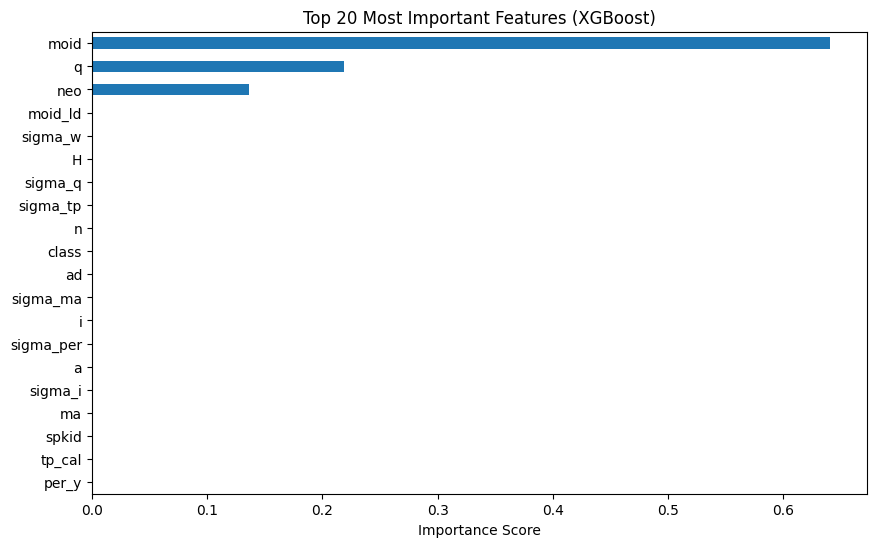

In [36]:
plt.figure(figsize=(10,6))
xgb_importances.sort_values().tail(20).plot(kind='barh')
plt.title("Top 20 Most Important Features (XGBoost)")
plt.xlabel("Importance Score")
plt.show()


# 5. Evaluation

### Evaluasi - Menyusun perbandingan kuantitatif untuk memutuskan model terbaik

In [37]:
# Menghitung metrik performa
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} Results:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print("----------------------------------")

# Evaluasi kedua model
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, xgb_preds, "XGBoost")


Random Forest Results:
Accuracy : 0.9996
Precision: 0.9992
Recall   : 0.9999
F1-Score : 0.9996
----------------------------------
XGBoost Results:
Accuracy : 0.9997
Precision: 0.9994
Recall   : 0.9999
F1-Score : 0.9997
----------------------------------


### Confusion Matrix (Alasan: Memberikan gambaran detail kesalahan model terutama untuk kelas minoritas PHA.)

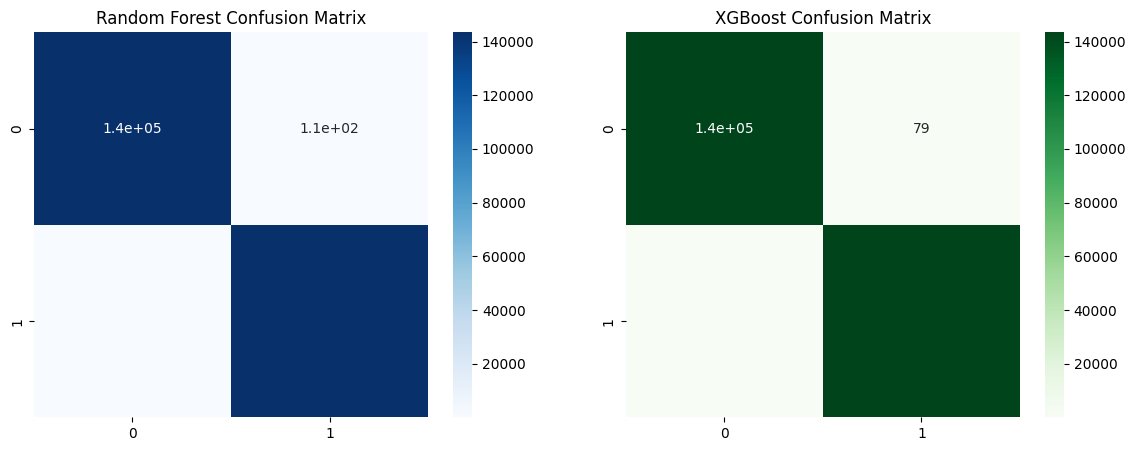

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, cmap="Blues", ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, cmap="Greens", ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")

plt.show()
